### Importação dos dados



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [11]:
faturamento_total = {
    'loja 1': loja['Preço'].sum(),
    'loja 2': loja2['Preço'].sum(),
    'loja 3': loja3['Preço'].sum(),
    'loja 4': loja4['Preço'].sum()
}

for loja, faturamento in faturamento_total.items():
    print(f'O faturamento total da {loja} foi de R${faturamento:.2f}')

O faturamento total da loja 1 foi de R$1534509.12
O faturamento total da loja 2 foi de R$1488459.06
O faturamento total da loja 3 foi de R$1464025.03
O faturamento total da loja 4 foi de R$1384497.58


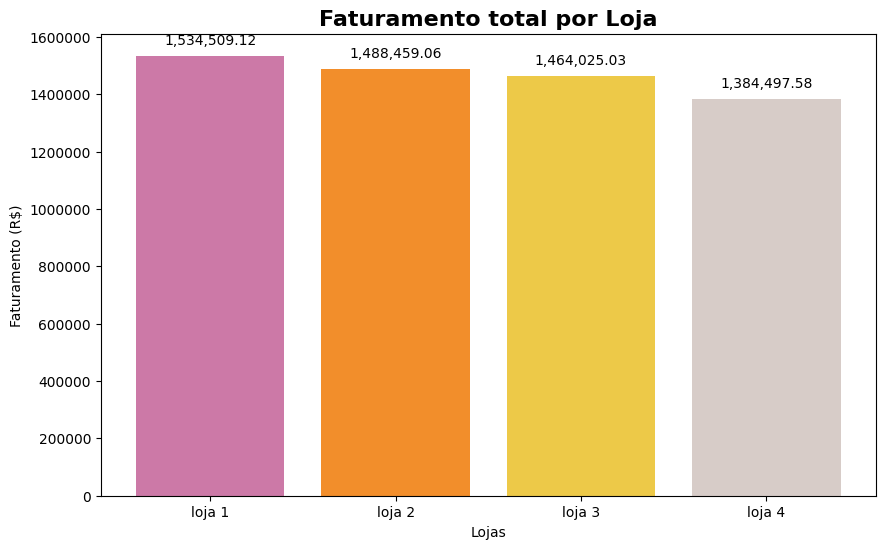

In [12]:
import matplotlib.pyplot as plt

cores = ['#CC79A7', '#F28E2B', '#EDC948', '#D7CCC8' ]

plt.figure(figsize=(10,6))
barras = plt.bar(faturamento_total.keys(), faturamento_total.values(), color=cores)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento total por Loja', fontsize=16, fontweight='bold')

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2,
             altura + (altura * 0.02),
             f'{altura:,.2f}',
             ha='center',
             va='bottom',
             fontsize=10)

plt.show()

# 2. Vendas por Categoria


In [15]:
def vendas_por_categoria(loja_df):
    loja_df.columns = loja_df.columns.str.strip()
    categorias = loja_df['Categoria do Produto']
    contagem = {}

    for categoria in categorias:
        if categoria in contagem:
            contagem[categoria] += 1
        else:
            contagem[categoria] = 1
    return contagem

vendas_loja1 = vendas_por_categoria(loja)
vendas_loja2 = vendas_por_categoria(loja2)
vendas_loja3 = vendas_por_categoria(loja3)
vendas_loja4 = vendas_por_categoria(loja4)

vendas_lojas = [vendas_loja1, vendas_loja2, vendas_loja3, vendas_loja4]

for i, vendas in enumerate(vendas_lojas, start=1):
    print(f"\nVendas por Categoria (Loja {i}):")
    for categoria in sorted(vendas.keys()):
        quantidade = vendas[categoria]
        print(f"{categoria}: {quantidade}")


Vendas por Categoria (Loja 1):
brinquedos: 324
eletrodomesticos: 312
eletronicos: 448
esporte e lazer: 284
instrumentos musicais: 182
livros: 173
moveis: 465
utilidades domesticas: 171

Vendas por Categoria (Loja 2):
brinquedos: 313
eletrodomesticos: 305
eletronicos: 422
esporte e lazer: 275
instrumentos musicais: 224
livros: 197
moveis: 442
utilidades domesticas: 181

Vendas por Categoria (Loja 3):
brinquedos: 315
eletrodomesticos: 278
eletronicos: 451
esporte e lazer: 277
instrumentos musicais: 177
livros: 185
moveis: 499
utilidades domesticas: 177

Vendas por Categoria (Loja 4):
brinquedos: 338
eletrodomesticos: 254
eletronicos: 451
esporte e lazer: 277
instrumentos musicais: 170
livros: 187
moveis: 480
utilidades domesticas: 201


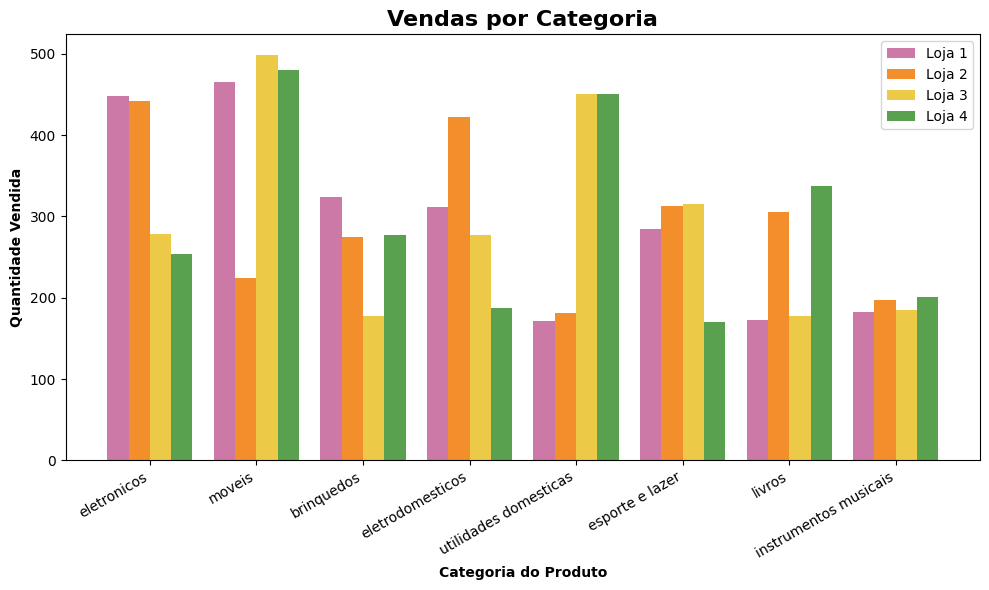

In [16]:
import matplotlib.pyplot as plt
import numpy as np

cores = ['#CC79A7', '#F28E2B', '#EDC948', '#59A14F' ]

categorias = list(vendas_loja1.keys())
n_categorias = len(categorias)

x = np.arange(n_categorias)
largura_barras = 0.2

plt.figure(figsize=(10,6))

for i, vendas in enumerate(vendas_lojas):
    valores = list(vendas.values())
    plt.bar(x + i * largura_barras, valores, width=largura_barras,
            label=f'Loja {i+1}', color=cores[i])

plt.xlabel('Categoria do Produto', fontweight='bold')
plt.ylabel('Quantidade Vendida', fontweight='bold')
plt.title('Vendas por Categoria', fontsize=16, fontweight='bold')

plt.xticks(x + largura_barras * 1.5, categorias, rotation=30, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [17]:
def calc_Avaliacao(df: pd.DataFrame) -> float:
    try:
        avaliacao = round(df['Avaliação da compra'].mean(), 2)
        return avaliacao
    except:
          print('Erro ao calcular a média da avaliação de compras')
          return 0.0

for nome, loja in zip(['loja 1', 'loja 2', 'loja 3', 'loja 4'],
                      [loja, loja2, loja3, loja4]):
    print(f'A avaliação média da {nome} é de {calc_Avaliacao(loja)}')

A avaliação média da loja 1 é de 3.98
A avaliação média da loja 2 é de 4.04
A avaliação média da loja 3 é de 4.05
A avaliação média da loja 4 é de 4.0


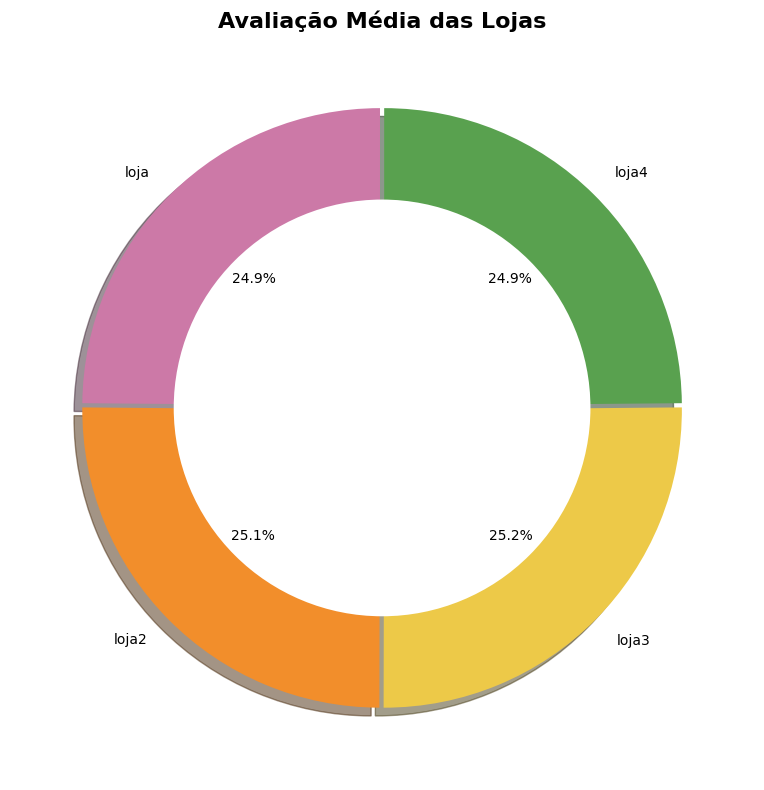

In [18]:
rotulos = ['loja','loja2','loja3', 'loja4']
tam = [calc_Avaliacao(loja), calc_Avaliacao(loja2),
       calc_Avaliacao(loja3), calc_Avaliacao(loja4)]
explode = (0.01,0.01,0.01,0.01)
cores = ['#CC79A7', '#F28E2B', '#EDC948', '#59A14F']

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(tam, explode=explode, labels=rotulos, colors=cores,
       autopct='%1.1f%%', startangle=90, shadow=True)

centro = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centro)

plt.title('Avaliação Média das Lojas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [19]:
from collections import Counter

lojas = [loja, loja2, loja3, loja4]
labels = []
mais_vendidos = []
menos_vendidos = []

nomes_mais = []
nomes_menos = []

for i, loja_df in enumerate(lojas, start=1):
    contagem = Counter(loja_df['Produto'])

    mais = contagem.most_common(1)[0]
    menos = min(contagem.items(), key=lambda x: x[1])

    labels.append(f'Loja {i}')
    mais_vendidos.append(mais[1])
    menos_vendidos.append(menos[1])
    nomes_mais.append(mais[0])
    nomes_menos.append(menos[0])

    print(f'\nLoja {i}:')
    print(f'Mais vendido: {mais[0]} ({mais[1]} unidades)')
    print(f'Menos vendido: {menos[0]} ({menos[1]} unidades)')


Loja 1:
Mais vendido: Cama box (62 unidades)
Menos vendido: Guitarra (33 unidades)

Loja 2:
Mais vendido: Iniciando em programação (65 unidades)
Menos vendido: Jogo de tabuleiro (32 unidades)

Loja 3:
Mais vendido: Kit banquetas (57 unidades)
Menos vendido: Blocos de montar (35 unidades)

Loja 4:
Mais vendido: Cama box (62 unidades)
Menos vendido: Guitarra (33 unidades)


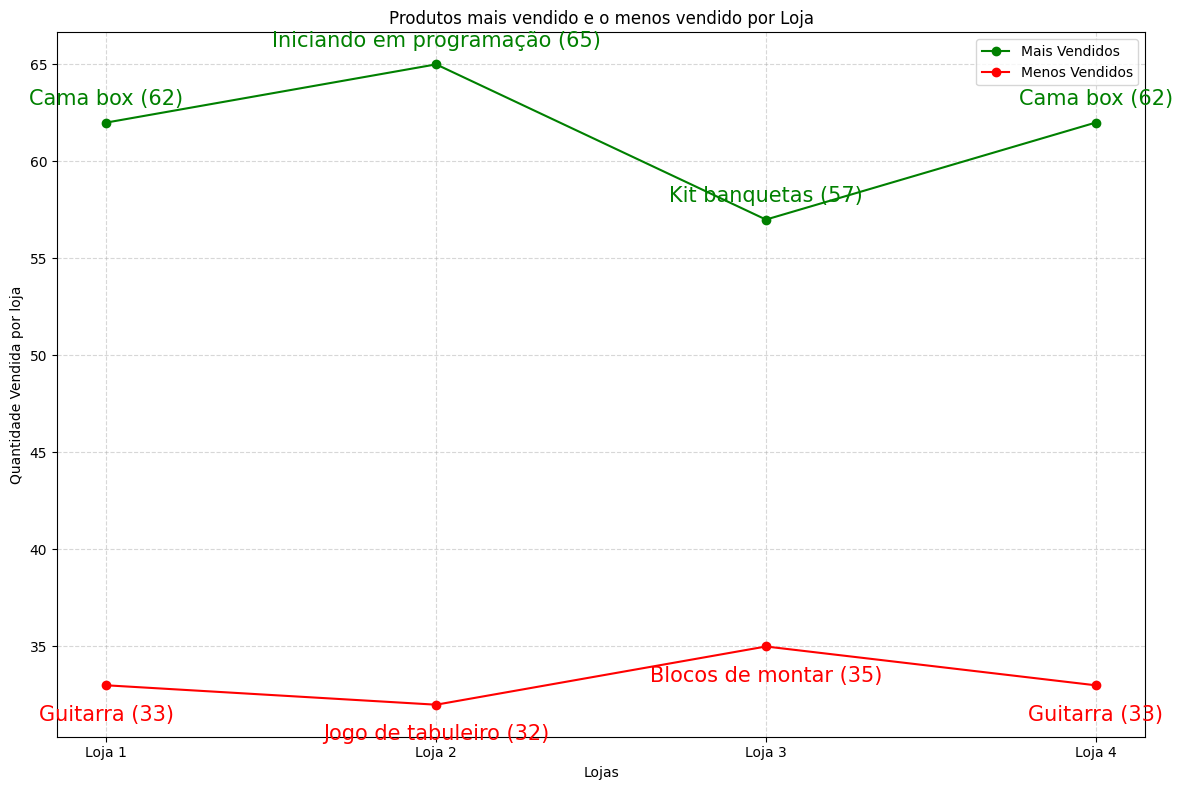

In [20]:
plt.figure(figsize=(12,8))
plt.plot(labels, mais_vendidos, marker='o',
         color='green', label='Mais Vendidos')
plt.plot(labels, menos_vendidos, marker='o',
         color='red', label='Menos Vendidos')

for i, label in enumerate(labels):
    plt.text(label, mais_vendidos[i]+0.9,
             f'{nomes_mais[i]} ({mais_vendidos[i]})',
             ha='center', color='green', fontsize=15)
    plt.text(label, menos_vendidos[i]-1,
        f'{nomes_menos[i]} ({menos_vendidos[i]})',
        ha='center', va='top', color='red', fontsize=15)

plt.title('Produtos mais vendido e o menos vendido por Loja')
plt.xlabel('Lojas')
plt.ylabel('Quantidade Vendida por loja')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [21]:
def frete_medio(loja):
  frete_medio = sum(loja['Frete']) / len(loja['Frete'])
  return frete_medio

for i, loja in enumerate([loja, loja2, loja3, loja4], start=1):
  print(f'O frete médio da loja {i} é de R${frete_medio(loja):.2f}')

O frete médio da loja 1 é de R$31.28
O frete médio da loja 2 é de R$33.62
O frete médio da loja 3 é de R$33.07
O frete médio da loja 4 é de R$31.28


In [22]:
import plotly.graph_objects as go

labels = ['loja 1', 'loja 2', 'loja 3', 'loja 4']
valores = [frete_medio(loja), frete_medio(loja2), frete_medio(loja3),
           frete_medio(loja4)]

fig = go.Figure(data=[go.Pie(labels=labels, values=valores,sort=False,)])
fig.update_layout(title_text='Frete médio por Loja', legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.3,
        xanchor='center',
        x=0.5
    ))
fig.show()

# Relatório final


A análise feita foram métricas avaliadas em: faturamento total, avaliação de produtos mais vendidos por categoria, o frete e avaliações de produtos mais e menos vendidos para que o Sr. João avalie o desempenho das 4 lojas. Para essa avaliação foram utilizados cálculos estátisticos e gráficos para identificar padrões e assim ter o diágnostico dos resultados.

1. **Análise do faturamento total**

A loja 1 obteve R$1,534,509.12 de lucro no faturamento total, porém a loja 4 obteve o menor rendimento.

2. **Análise da venda por categoria**

A análise feita aqui é que móveis e eletrônicos tem números grandes de venda nessas categorias nas quatro lojas. Analisando o gráfico é perceptivel que a loja 3 se destacou na venda de móveis enquanto as outras lojas possuem um perfil mais equilibrado entre os produtos, a loja 3 e 4 também tem alto índice em vendas de utilidade doméstica com relação as outras.
Em todas as lojas o que menos tem venda são a de instrumentos musicais e livros.

3. **Média de avaliação das lojas**

Todas as lojas possuem a mesma consitência no atendimento.

Sendo a loja 3 a menor variação e com maior consistência e demonsrando um nível alto de satisfação dos clientes.

enquanto a loja 1 contém a menor média no atendimento de avalição dos clientes.

4. **Produtos mais e menos vendidos**

Em todas as lojas os produtos mais vendidos são o de movéis e eletrodomésticos. Porém no menos vendido são os jogos em um geral e instrumentos musicais.

Mas entre as quatro lojas a loja 2 tem o maior número de vendas com 65 unidades vendidas. A menor venda também é da loja 2 com 32 unidades vendidas.

5. Frete médio por loja

a variação de uma loja para a outra é de aproximadamente R$ 3,40.

O destaque no gráfico vai para a loja 1 que possui em torno de R$ 34

e a destribuição é equilibrada entre as demais lojas. Mas dentre as 4 lojas a
loja 4 possui o menor custo de frete.

Conclusão geral

Após essas 5 análises e comparações entre as quatro lojas. A loja 4 possui o desempenho mais fraco, com um faturamento baixo e vendas baixas.

A loja 2 e 3 estão com desempenho similar entre lucros, vendas, satisfação dos clientes e frete médio.

A loja 1 teve o maior desempenho mesmo com o frete alto, precisa melhorar na avaliação dos clientes, porém teve o melhor faturamento.

Aconselho ao Sr.João vender a loja 4 pois é a loja com menor faturamento e que apesar do frete barato não obteve grandes lucros.


